In [1]:
import os
import tables as tb
import numpy  as np
from matplotlib import pyplot as plt

from invisible_cities.cities.dorothea        import Dorothea
from invisible_cities.core.system_of_units_c import units
from invisible_cities.core.configure         import configure
from invisible_cities.reco.dst_functions     import load_dst
from invisible_cities.io                     import pmap_io  as pio
from invisible_cities.core import fit_functions as fitf

In [2]:
ic_data = os.path.join(os.environ['IC_DATA'])
mc_pmaps = ic_data + 'Montecarlo/Kr/new_mc/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_pmaps_1000.root.h5.h5'
dt_pmaps = '/Users/alej/Desktop/irene/full_chain/Kr_4446_full_chain.h5'                      
conf_path = '/Users/alej/Desktop/Valencia/nextic/IC-1/invisible_cities/config/dorothea.conf'
run = 4446

In [50]:
# initialize dorothea
PATH_IN  = os.path.join(mc_pmaps)
PATH_OUT = os.path.join('/Users/alej/Desktop/dorothea/garbage.h5')
conf     = configure(('dummy ' + conf_path).split()).as_dict
conf.update(dict(run_number = 0,
                 files_in   = PATH_IN,
                 file_out   = PATH_OUT,
                 nmax       = 100000))
dorMC = Dorothea(**conf)
#dorMC.run()
#dst_mc = load_dst(PATH_OUT, "DST", "Events")

In [48]:
# initialize dorothea
PATH_IN  = os.path.join(dt_pmaps)
PATH_OUT = os.path.join('/Users/alej/Desktop/dorothea/garbage.h5')
conf     = configure(('dummy ' + conf_path).split()).as_dict
conf.update(dict(run_number = run,
                 files_in   = PATH_IN,
                 file_out   = PATH_OUT,
                 nmax       = 100000))
dorDT = Dorothea(**conf)
#dorDT.run()
#dst_data = load_dst(PATH_OUT, "DST", "Events")

In [67]:
def plot_s1_features(dst, labels):
    plt.figure(figsize=(20,5))
    subplot=141
    for feature, lab in zip([dst.S1w, dst.S1h, dst.S1e, dst.S1t], 
                       ['s1 width (mus)', 's1 height (pes)', 's1 energy (pes)', 's1 time (mus)']):
        plt.subplot(subplot)
        if lab=='s1 time (mus)':plt.hist(feature / units.mus, bins=30)
        else:plt.hist(feature , bins=30)
        if lab=='s1 height (pes)': plt.xlim(None,7.5)
        if lab=='s1 energy (pes)': plt.xlim(None, 30)

        plt.title(lab)
        plt.grid(True)
        subplot+=1
    plt.show()  

MONTECARLO


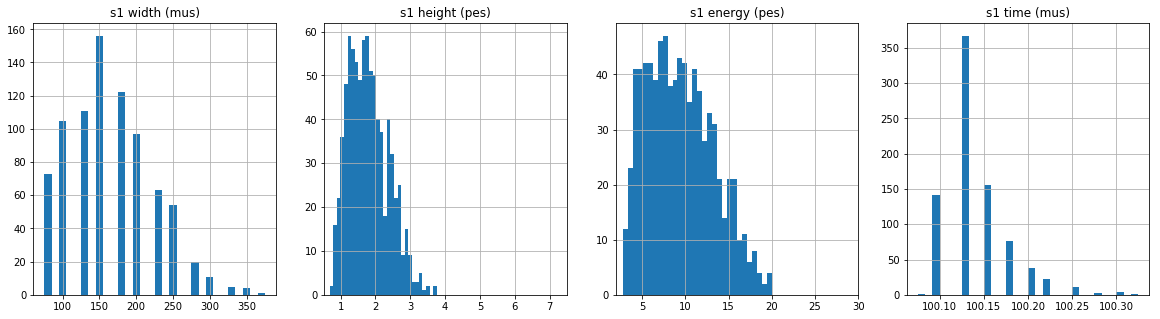

DATA


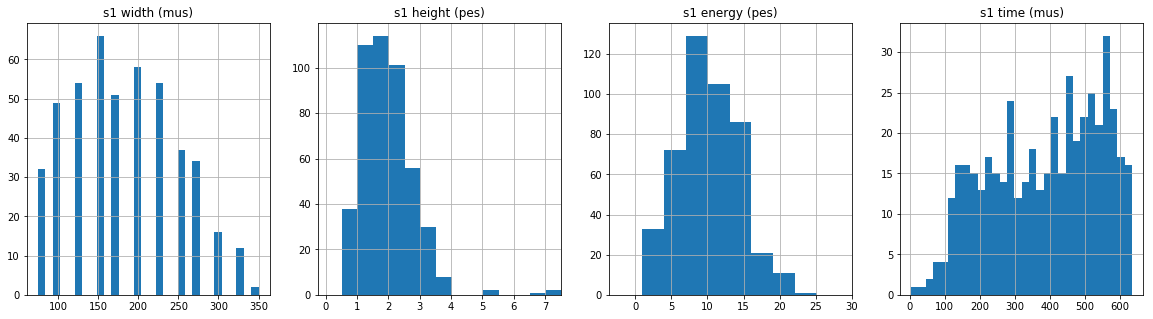

In [68]:
labels=['s1 width (mus)', 's1 height (pes)', 's1 energy (pes)', 's1 time (mus)']
print('MONTECARLO')
plot_s1_features(dst_mc, labels)
print('DATA')
plot_s1_features(dst_data, labels)

MONTECARLO


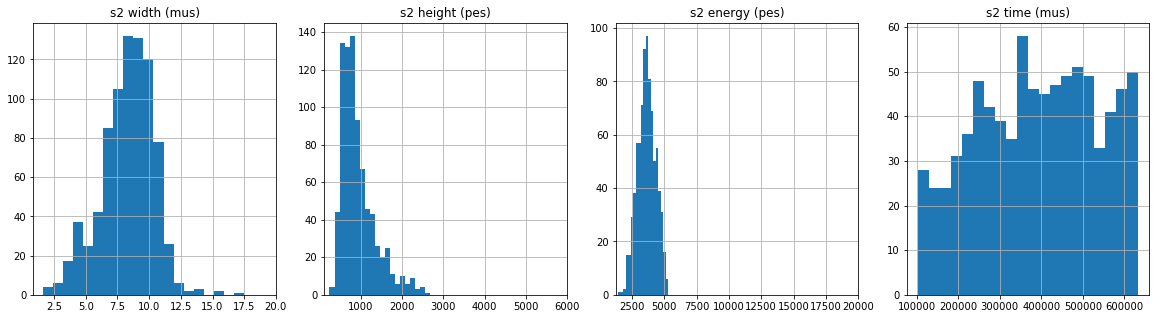

DATA


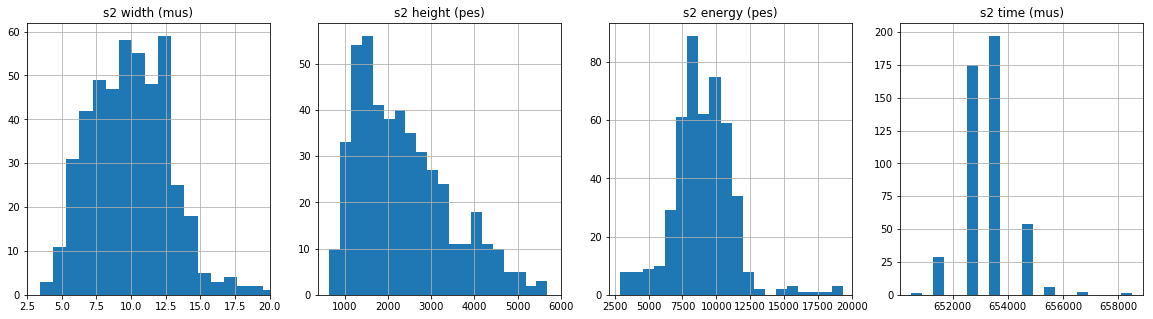

In [38]:
def plot_s2_features(dst, labels):
    plt.figure(figsize=(20,5))
    subplot=141
    for feature, lab in zip([dst.S2w, dst.S2h, dst.S2e, dst.S2t], 
                       ['s2 width (mus)', 's2 height (pes)', 's2 energy (pes)', 's2 time (mus)']):
        plt.subplot(subplot)
        if lab=='s1 time (mus)':plt.hist(feature / units.mus, bins=20)
        else:plt.hist(feature , bins=20)
        if lab=='s2 width (mus)' : plt.xlim(None,20)
        if lab=='s2 height (pes)': plt.xlim(None,6e3)
        if lab=='s2 energy (pes)': plt.xlim(None,2e4)

        plt.title(lab)
        plt.grid(True)
        subplot+=1
    plt.show()

labels=['s2 width (mus)', 's2 height (pes)', 's2 energy (pes)', 's2 time (mus)']
print('MONTECARLO')
plot_s2_features(dst_mc, labels)
print('DATA')
plot_s2_features(dst_data, labels)

In [43]:
def compare_scatter(dst, xlabs, ylabs):   
    figsize=(20,6)
    plt.figure(figsize=figsize)
    ax = plt.subplot(1, 3, 1)
    #plt.hist2d(dst.Z, dst.S2e, bins=(25, 25))
    plt.scatter(dst.Z, dst.S2e, c='r', s=25, alpha=.2)
    plt.xlabel('Z (mm)')
    plt.ylabel('S2 energy (pes)')
    plt.ylim(None,2e4)
    plt.grid(True)

    ax = plt.subplot(1, 3, 2)
    #plt.hist2d(dst.Z, dst.S1e, bins=(25, 25))
    plt.scatter(dst.Z, dst.S1e, c='g', s=25, alpha=.2)
    plt.xlabel('Z (mm)')
    plt.ylabel('S1 energy (pes)')
    plt.ylim(None,30)
    plt.grid(True)

    ax = plt.subplot(1, 3, 3)
    #plt.hist2d(dst.S2e, dst.S1e, bins=(25, 25))
    plt.scatter(dst.S2e, dst.S1e, c='b', s=25, alpha=.2)
    plt.xlabel('S2 energy (pes)')
    plt.ylabel('S1 energy (pes)')
    plt.ylim(None,30)
    plt.grid(True)
    plt.show()

MONTECARLO


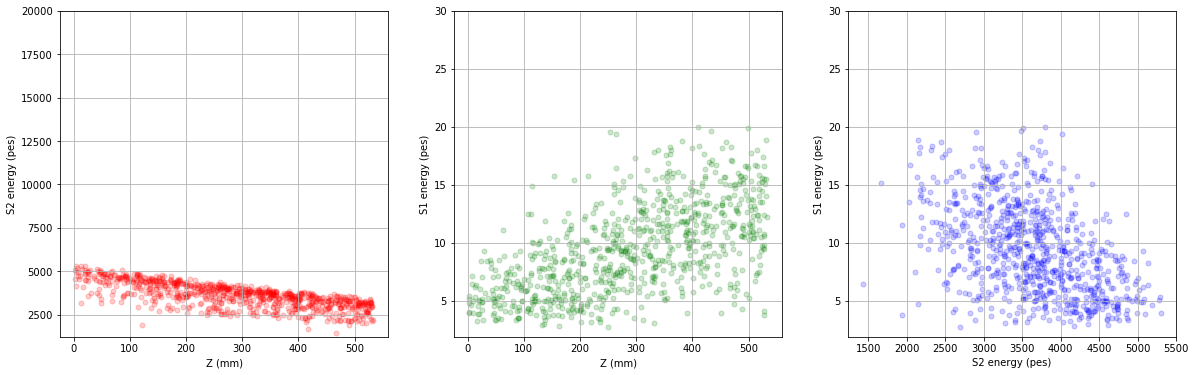

DATA


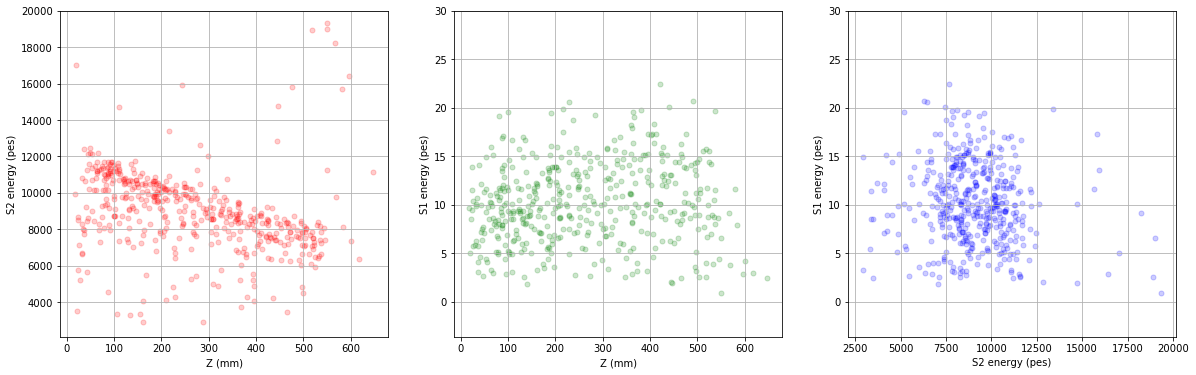

In [44]:
xlabs = ['Z (mm)', 'Z (mm)', 'S2 energy (pes)']
ylabs = ['S2 energy (pes)','S1 energy (pes)','S1 energy (pes)']
print('MONTECARLO')
compare_scatter(dst_mc  , xlabs, ylabs)
print('DATA')
compare_scatter(dst_data, xlabs, ylabs)


MONTECARLO


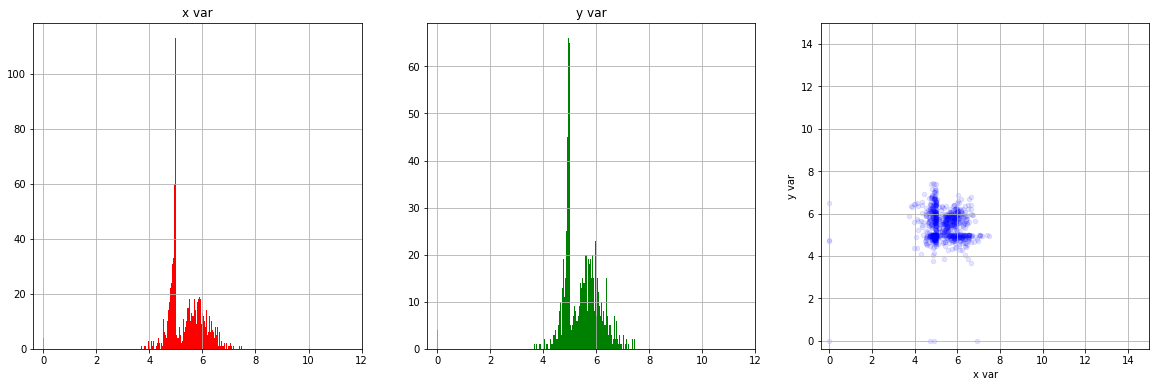

DATA


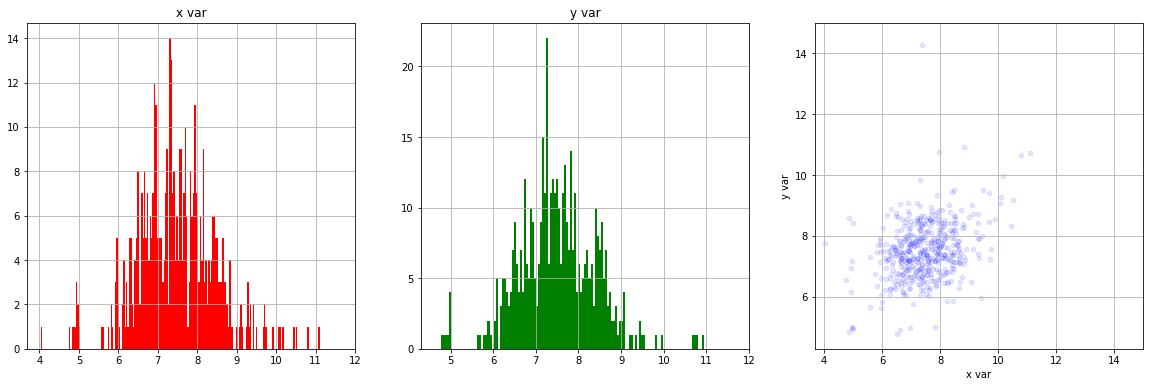

In [69]:
from matplotlib.colors import LogNorm
def compare_cluster(dst):    
    plt.figure(figsize=(20,6))

    subplot=131
    labels = ['x var', 'y var']
    C = ['red', 'green']
    for feature, lab , c in zip([dst.Xrms, dst.Yrms], labels, C):
        plt.subplot(subplot)
        plt.hist(feature, bins=200, color=c)
        plt.title(lab)
        plt.grid(True)
        plt.xlim(None,12)
        #plt.ylim(None,12)
        subplot+=1
    plt.subplot(subplot)
    plt.scatter(dst.Xrms, dst.Yrms, s=20, alpha=.1, c='b')
    #plt.hist2d(dst.Xrms, dst.Yrms, bins=(30,30), norm=LogNorm())
    #plt.colorbar()
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.xlim(None,15)
    plt.ylim(None,15)

    plt.grid(True)
    plt.show()
print('MONTECARLO')
compare_cluster(dst_mc  )
print('DATA')
compare_cluster(dst_data)